In [1]:
%load_ext autoreload
%autoreload 2
%pip install -r requirements.txt

from constants_and_utils import *

from generate_personas import *
from generate_networks import *
from analyze_networks import *
from plotting import *
from network_datasets import *

import matplotlib.pyplot as plt


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


# Analyze networks

x_to_keep_inner ['Density']
Dropping node-level stats: kept 1806 out of 25347 rows
Keeping rows in ['Density']: kept 258 out of 1806 rows


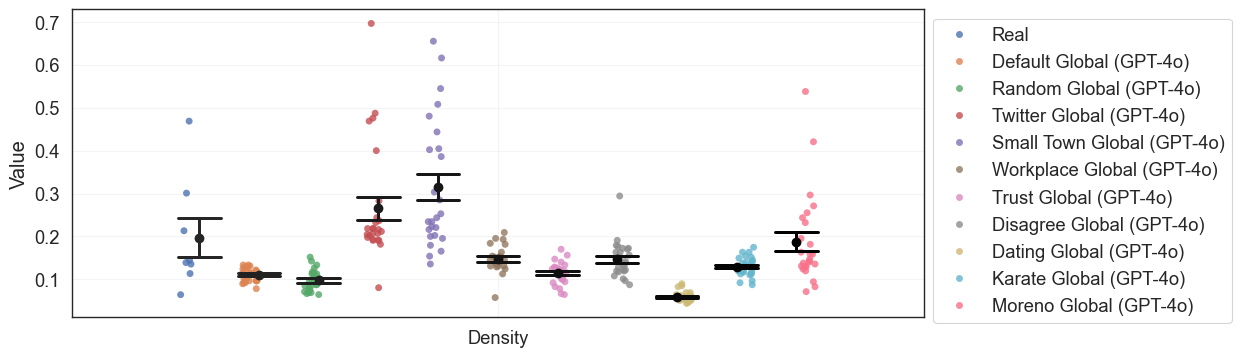

x_to_keep_inner ['Avg clustering coef']
Dropping node-level stats: kept 1806 out of 25347 rows
Keeping rows in ['Avg clustering coef']: kept 258 out of 1806 rows


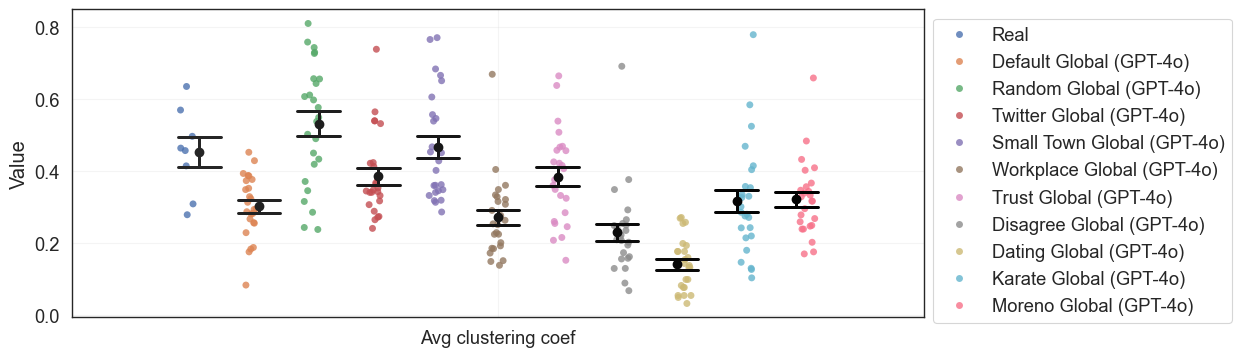

x_to_keep_inner ['Prop nodes LCC']
Dropping node-level stats: kept 1806 out of 25347 rows
Keeping rows in ['Prop nodes LCC']: kept 258 out of 1806 rows


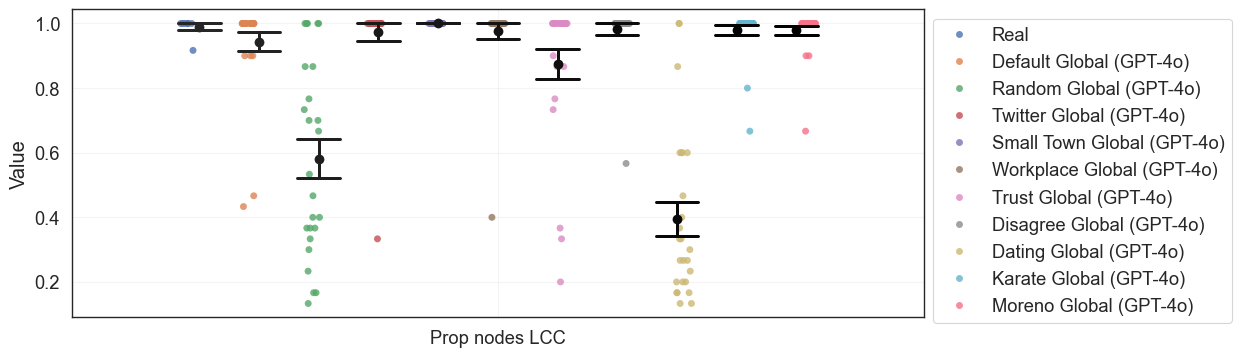

x_to_keep_inner ['Avg shortest path']
Dropping node-level stats: kept 1806 out of 25347 rows
Keeping rows in ['Avg shortest path']: kept 258 out of 1806 rows


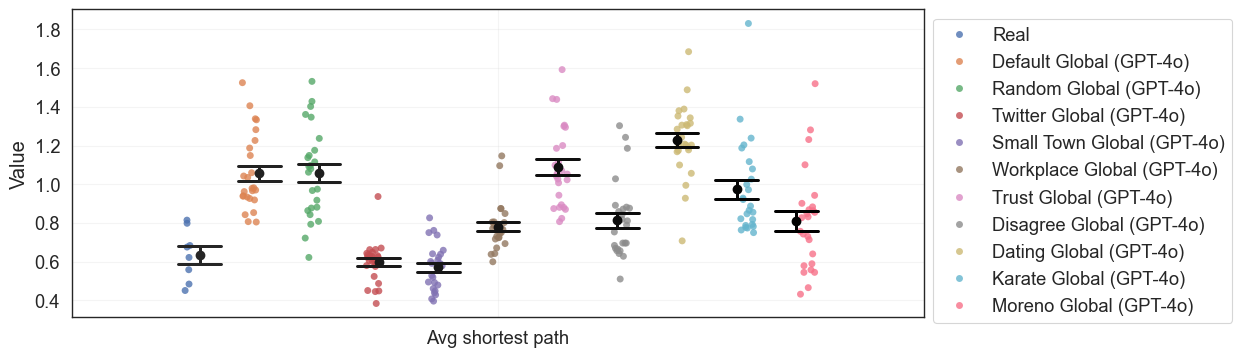

x_to_keep_inner ['Modularity']
Dropping node-level stats: kept 1806 out of 25347 rows
Keeping rows in ['Modularity']: kept 258 out of 1806 rows


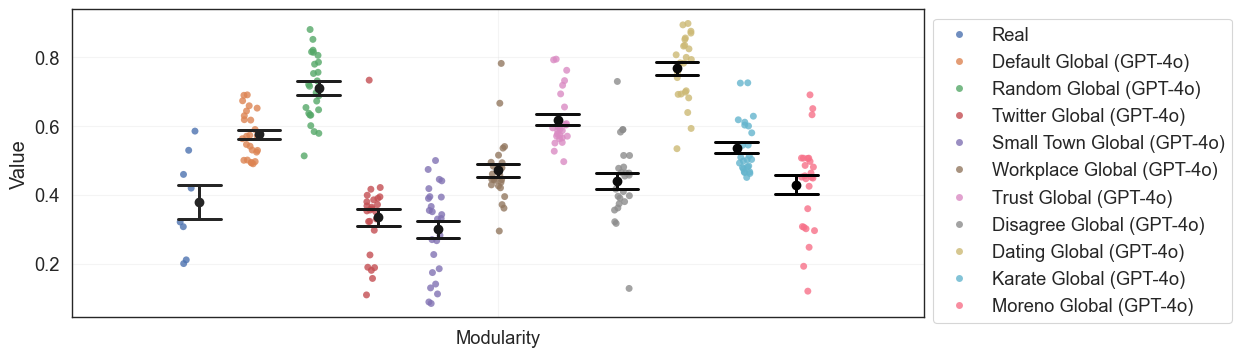

x_to_keep_inner ['Radius']
Dropping node-level stats: kept 1806 out of 25347 rows
Keeping rows in ['Radius']: kept 258 out of 1806 rows


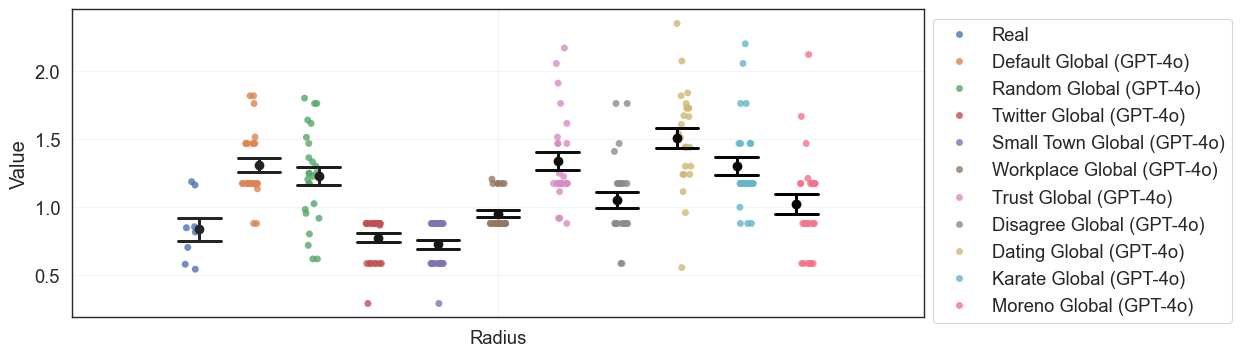

x_to_keep_inner ['Diameter']
Dropping node-level stats: kept 1806 out of 25347 rows
Keeping rows in ['Diameter']: kept 258 out of 1806 rows


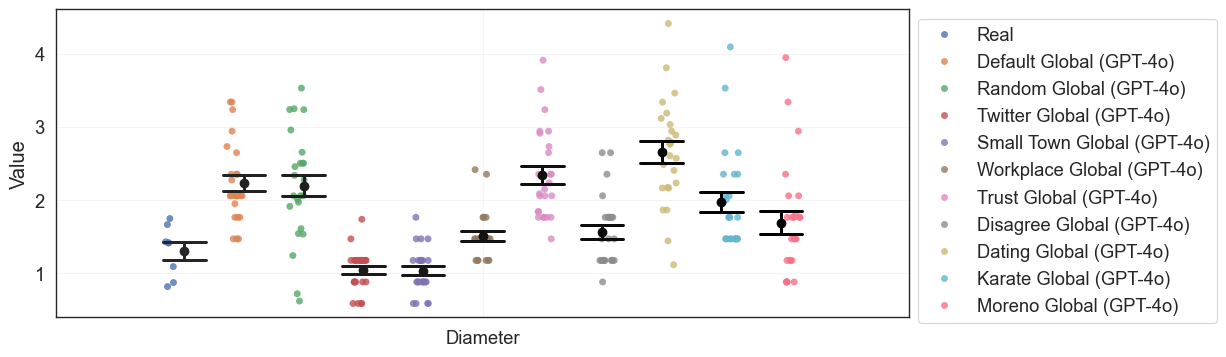

Dropping node-level stats: kept 1806 out of 25347 rows
Keeping rows in ['Density', 'Avg clustering coef', 'Prop nodes LCC', 'Avg shortest path', 'Modularity', 'Radius', 'Diameter']: kept 1806 out of 1806 rows


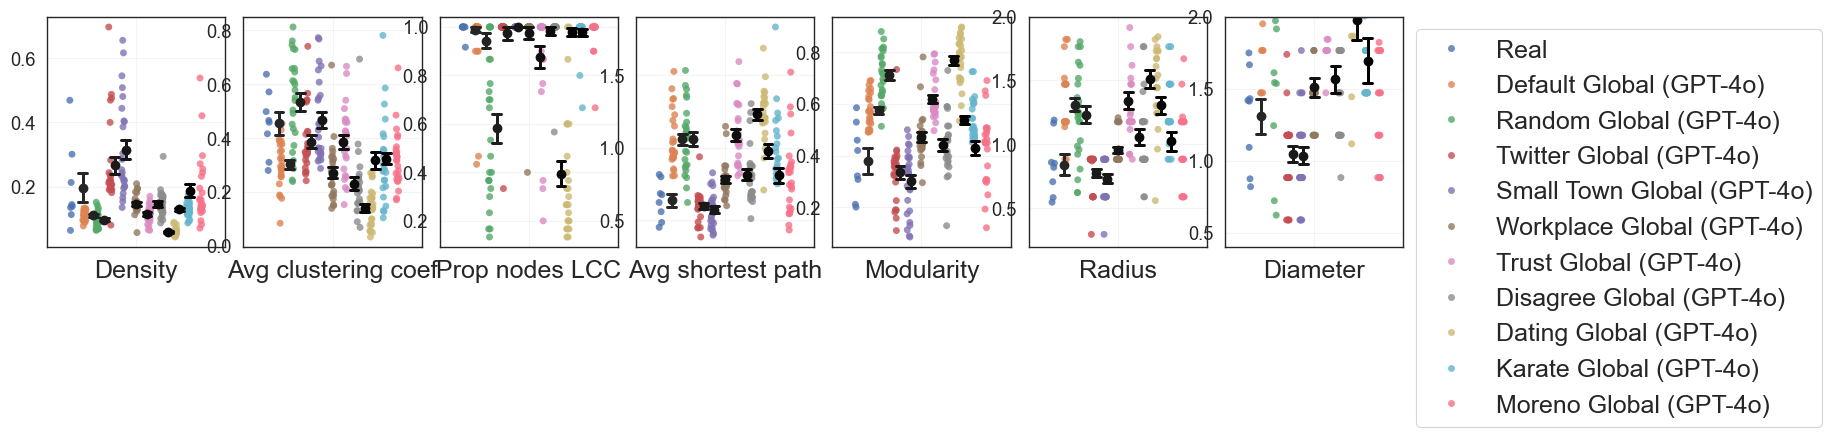

Dropping node-level stats: kept 1806 out of 25347 rows
Keeping rows in ['Density', 'Avg clustering coef', 'Prop nodes LCC', 'Avg shortest path', 'Modularity', 'Radius', 'Diameter']: kept 1806 out of 1806 rows


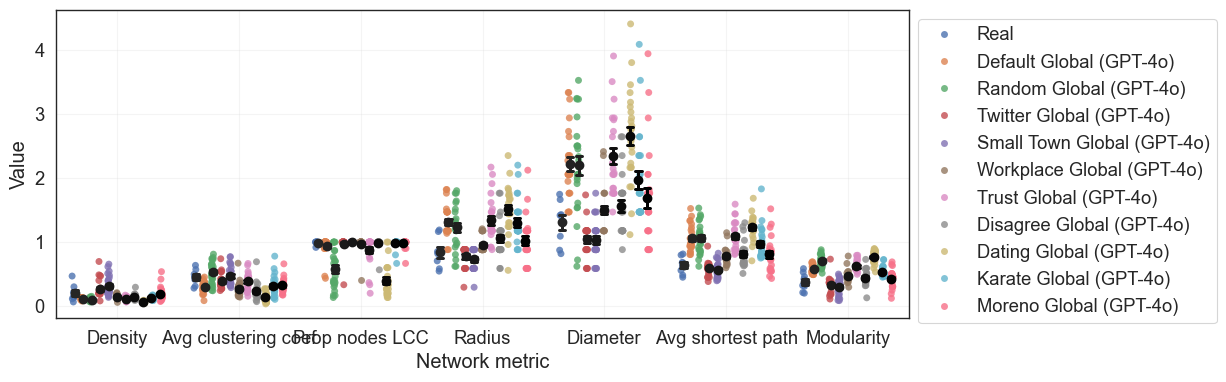

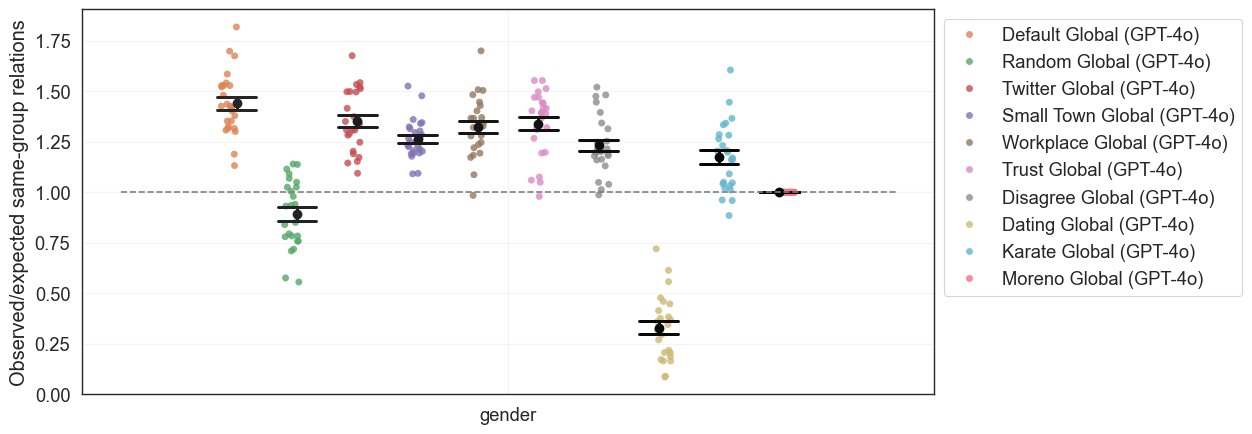

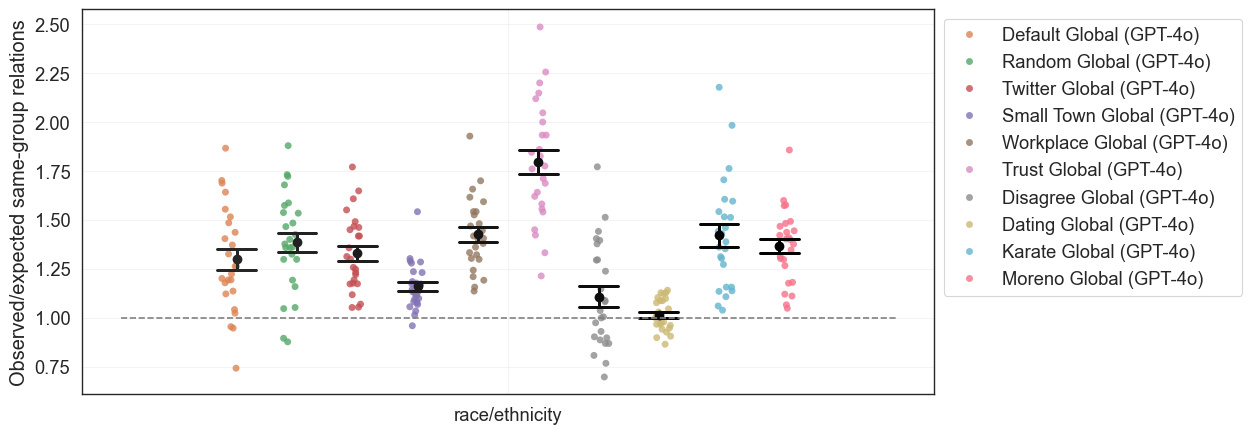

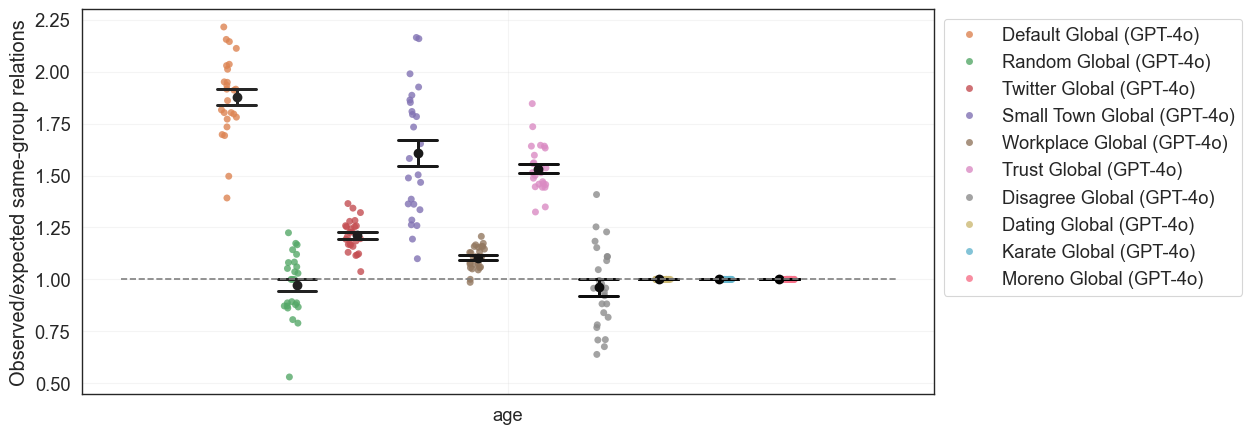

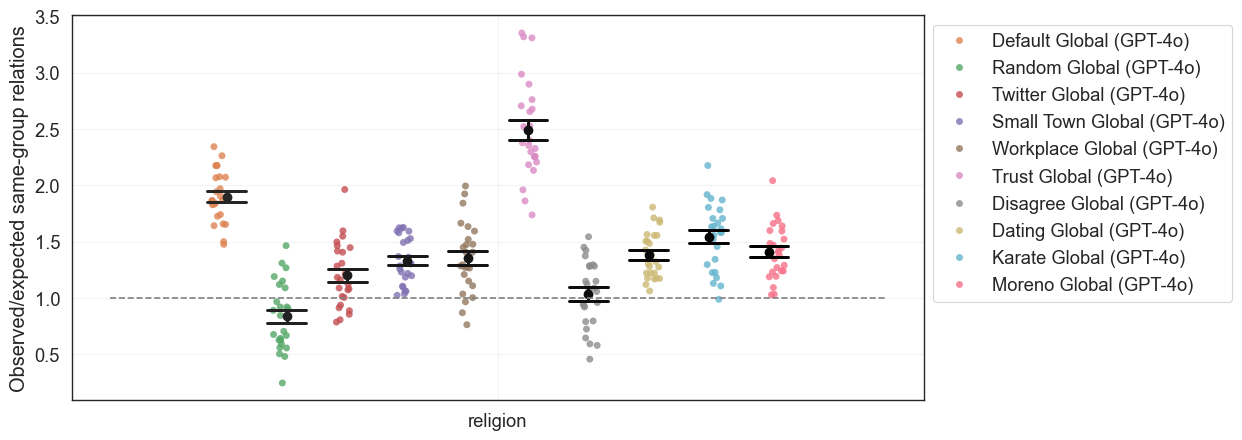

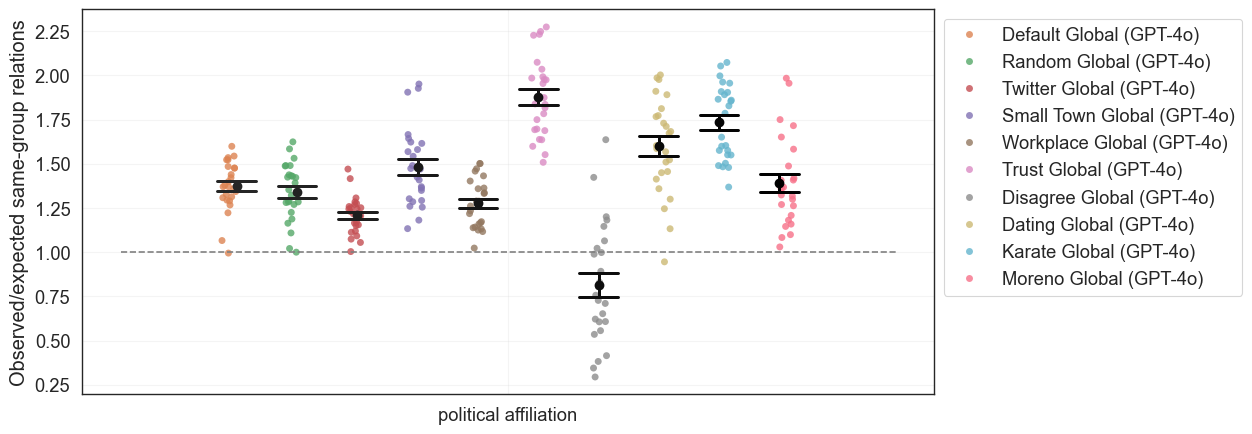

--------------------------------
GROUP global-expressive_gpt-4o_w_names_w_interests_w_reason_default
Polarization: mean=0.262, se=0.040
Isolation: 0.285, 0.016

--------------------------------
GROUP global-expressive_gpt-4o_w_names_w_interests_w_reason_random


FileNotFoundError: [Errno 2] No such file or directory: './text-files/us_50_w_names_w_interests_random.json'

In [ ]:
network_df = pd.read_csv(f'stats/real/network_metrics.csv')
metric_dfs = [network_df]
homophily_dfs = []

methods = ['global', 'global-expressive', 'local', 'sequential']
methods = ['global', 'global-expressive', 'sequential']
extensions = ['_ALL_SHUFFLED', '_w_interests', '_only_interests', '_temp06', '_temp10', '_prompt_all', '_w_reason']
extensions = ['_w_interests']

group_names = {
    #'global-expressive_gpt-4o_w_interests_w_reason': 'global-expressive_gpt-4o_w_interests_w_reason',
    #'sequential_gpt-4o_w_interests': 'Sequential (GPT-4o)',
    #'global-expressive_gpt-4o_w_names_w_interests_w_reason': 'New Global (GPT-4o)',
    'real': 'Real',
    #'global-expressive_gpt-4o_w_names_w_interests_w_reason_default': 'Default Global (GPT-4o)',
    'global-expressive_gpt-4o_w_names_w_interests_w_reason_default': 'Default Global (GPT-4o)',
    'global-expressive_gpt-4o_w_names_w_interests_w_reason_random': 'Random Global (GPT-4o)',
    'global-expressive_gpt-4o_w_names_w_interests_w_reason_twitter': 'Twitter Global (GPT-4o)',
    'global-expressive_gpt-4o_w_names_w_interests_w_reason_smalltown': 'Small Town Global (GPT-4o)',
    'global-expressive_gpt-4o_w_names_w_interests_w_reason_workplace': 'Workplace Global (GPT-4o)',
    'global-expressive_gpt-4o_w_names_w_interests_w_reason_trust': 'Trust Global (GPT-4o)',
    #'global-expressive_gpt-4o_w_names_w_interests_w_reason_disease': 'Disease Global (GPT-4o)',
    #'global-expressive_gpt-4o_w_names_w_interests_w_reason_hate': 'Hate Global (GPT-4o)',
    'global-expressive_gpt-4o_w_names_w_interests_w_reason_disagree': 'Disagree Global (GPT-4o)',
    'global-expressive_gpt-4o_w_names_w_interests_w_reason_dating': 'Dating Global (GPT-4o)',
    'global-expressive_gpt-4o_w_names_w_interests_w_reason_karate': 'Karate Global (GPT-4o)',
    'global-expressive_gpt-4o_w_names_w_interests_w_reason_moreno': 'Moreno Global (GPT-4o)',
}

persona_files = {
    #'global-expressive_gpt-4o_w_interests_w_reason': 'us_50_w_names_w_interests.json',
    #'sequential_gpt-4o_w_interests': 'us_50_w_names_w_interests.json',
    #'global-expressive_gpt-4o_w_names_w_interests_w_reason': 'us_50_w_names_w_interests.json',
    'global-expressive_gpt-4o_w_names_w_interests_w_reason_default': 'us_30_w_names_w_interests_default.json',
    'global-expressive_gpt-4o_w_names_w_interests_w_reason_twitter': 'us_30_w_names_w_interests_twitter.json',
    'global-expressive_gpt-4o_w_names_w_interests_w_reason_smalltown': 'us_30_w_names_w_interests_smalltown.json',
    'global-expressive_gpt-4o_w_names_w_interests_w_reason_workplace': 'us_30_w_names_w_interests_workplace.json',
    'global-expressive_gpt-4o_w_names_w_interests_w_reason_trust': 'us_30_w_names_w_interests_trust.json',
    'global-expressive_gpt-4o_w_names_w_interests_w_reason_disease': 'us_30_w_names_w_interests_disease.json',
    'global-expressive_gpt-4o_w_names_w_interests_w_reason_hate': 'us_30_w_names_w_interests_hate.json',
    'global-expressive_gpt-4o_w_names_w_interests_w_reason_disagree': 'us_30_w_names_w_interests_disagree.json',
    'global-expressive_gpt-4o_w_names_w_interests_w_reason_dating': 'us_30_w_names_w_interests_dating.json',
    'global-expressive_gpt-4o_w_names_w_interests_w_reason_karate': 'us_30_w_names_w_interests_karate.json',
    'global-expressive_gpt-4o_w_names_w_interests_w_reason_moreno': 'us_30_w_names_w_interests_moreno.json',
    'global-expressive_gpt-4o_w_names_w_interests_w_reason_random': 'us_30_w_names_w_interests_random.json',
}

to_keep = [key for key in group_names.keys()]
groups = [key for key in group_names.keys() if key != 'real']



palette = sns.color_palette("deep") + sns.color_palette("husl", 8) + sns.color_palette("Set2", 8)
colors = {'real': palette[0]}

metric_dfs = [pd.read_csv(f'stats/real/network_metrics.csv')]

group_count = 0
for group in groups:
    metric_dfs.append(pd.read_csv(f'stats/{group}/network_metrics.csv'))
    homophily_dfs.append(pd.read_csv(f'stats/{group}/homophily.csv'))
    group_count = group_count + 1
    colors[group] = palette[group_count]

network_df = pd.concat(metric_dfs)
#print(network_df.groupby('save_name').size())

homophily_df = pd.concat(homophily_dfs)
#print(homophily_df.groupby('save_name').size())

def rename_network_metrics(n):
    if n == 'prop_nodes_lcc' or n == 'Prop nodes lcc':
        return 'Prop nodes LCC'
    n = n.split('_')
    n = ' '.join(n)
    return n.capitalize()

#for n in network_df['metric_name'].unique():
#    print(n, rename_network_metrics(n))
    
network_df['metric_name'] = network_df['metric_name'].apply(rename_network_metrics)
network_df.head()

legend_mapper = group_names


x_to_keep = ['Density', 'Avg clustering coef', 'Prop nodes LCC', 'Avg shortest path', 'Modularity', 'Radius', 'Diameter']


#to_keep = ['real', 'global_gpt-4o_w_interests', 'global-expressive_gpt-4o_w_names_w_interests_w_reason', 'sequential_gpt-4o_w_interests', 'global-expressive_gpt-4o_w_names_w_interests_w_reason_twitter']
#to_keep = ['real', 'global-expressive_gpt-4o_w_names_w_interests_w_reason', 'sequential_gpt-4o_w_interests']

kept_df = network_df[network_df.save_name.isin(to_keep)]

for x_to_keep_val in x_to_keep:
    x_to_keep_inner = [x_to_keep_val]
    print("x_to_keep_inner", x_to_keep_inner)
    kept_df = network_df[network_df.save_name.isin(to_keep)]
    network_df[network_df['metric_name'].isin(x_to_keep_inner) & ~network_df.save_name.str.contains('gpt-3.5')].groupby(['save_name', 'metric_name'])['_metric_value'].agg(['count', 'mean', 'sem']).round(3)
    #plot_metrics_separately(kept_df, plot_type='default', x_to_keep=x_to_keep_inner, palette=colors, simplify_legend=True, legend_mapper=legend_mapper)
    make_plot(kept_df, plot_type='default', legend_mapper=legend_mapper, palette=colors, x_to_keep=x_to_keep_inner, figsize=(11, 4), legend_pos=(1,1))

network_df[network_df['metric_name'].isin(x_to_keep) & ~network_df.save_name.str.contains('gpt-3.5')].groupby(['save_name', 'metric_name'])['_metric_value'].agg(['count', 'mean', 'sem']).round(3)
plot_metrics_separately(kept_df, plot_type='default', x_to_keep=x_to_keep, palette=colors, simplify_legend=True, legend_mapper=legend_mapper)
make_plot(kept_df, plot_type='default', legend_mapper=legend_mapper, palette=colors, x_to_keep=x_to_keep, figsize=(11, 4), legend_pos=(1,1))

to_keep.remove('real')

kept_df = homophily_df[homophily_df.save_name.isin(to_keep) & (homophily_df['demo'] == 'gender')]
make_plot(kept_df, plot_homophily=True, plot_type='default', legend_mapper=legend_mapper, palette=colors, 
          dodge=0.55, figsize=(11, 5), legend_pos=(1,1))

kept_df = homophily_df[homophily_df.save_name.isin(to_keep) & (homophily_df['demo'] == 'race/ethnicity')]
make_plot(kept_df, plot_homophily=True, plot_type='default', legend_mapper=legend_mapper, palette=colors, 
          dodge=0.55, figsize=(11, 5), legend_pos=(1,1))

kept_df = homophily_df[homophily_df.save_name.isin(to_keep) & (homophily_df['demo'] == 'age')]
make_plot(kept_df, plot_homophily=True, plot_type='default', legend_mapper=legend_mapper, palette=colors, 
          dodge=0.55, figsize=(11, 5), legend_pos=(1,1))

kept_df = homophily_df[homophily_df.save_name.isin(to_keep) & (homophily_df['demo'] == 'religion')]
make_plot(kept_df, plot_homophily=True, plot_type='default', legend_mapper=legend_mapper, palette=colors, 
          dodge=0.55, figsize=(11, 5), legend_pos=(1,1))

kept_df = homophily_df[homophily_df.save_name.isin(to_keep) & (homophily_df['demo'] == 'political affiliation')]
make_plot(kept_df, plot_homophily=True, plot_type='default', legend_mapper=legend_mapper, palette=colors, 
          dodge=0.55, figsize=(11, 5), legend_pos=(1,1))





def report_isolation_index(group):
    personas = []
    fn = os.path.join(PATH_TO_TEXT_FILES, persona_files[group])
    with open(fn) as f:
        personas = json.load(f)
    list_of_G = load_list_of_graphs(f'{group}', 0, 30, directed=False)
    isolation = []
    exposure_c = []
    exposure_l = []
    for G in list_of_G:
        i, c, l = compute_isolation_index(G, personas)
        isolation.append(i)
        exposure_c.append(c)
        exposure_l.append(l)
    print(f'Isolation: {np.mean(isolation):0.3f}, {np.std(isolation)/np.sqrt(len(isolation)):0.3f}')
    #print(f'Avg exposure, conservative: {np.mean(exposure_c):0.3f}, {np.std(exposure_c)/np.sqrt(len(exposure_c)):0.3f}')
    #print(f'Avg exposure, liberal: {np.mean(exposure_l):0.3f}, {np.std(exposure_l)/np.sqrt(len(exposure_l)):0.3f}')

def report_polarization(group):
    personas = []
    fn = os.path.join(PATH_TO_TEXT_FILES, persona_files[group])
    with open(fn) as f:
        personas = json.load(f)
    list_of_G = load_list_of_graphs(f'{group}', 0, 30, directed=False)
    #print(f'{group}: found {len(list_of_G)} graphs')
    pol = []
    for G in list_of_G:
        p = compute_polarization(G, personas)
        pol.append(p)
    print(f'Polarization: mean={np.mean(pol):0.3f}, se={np.std(pol)/np.sqrt(len(pol)):0.3f}')


for group in groups:
    print('--------------------------------')
    print("GROUP", group)
    report_polarization(group)       
    report_isolation_index(group)
    print()



In [345]:
homophily_df = pd.concat(homophily_dfs)
print(homophily_df.groupby('save_name').size())

save_name
global-expressive_gpt-4o-mini_w_interests_w_reason       300
global-expressive_gpt-4o_w_interests                     300
global-expressive_gpt-4o_w_interests_w_reason            300
global-expressive_gpt-4o_w_names_w_interests_w_reason    200
global_gpt-4o_w_interests                                300
sequential_gpt-4o_w_interests                            300
dtype: int64


In [346]:
def rename_network_metrics(n):
    if n == 'prop_nodes_lcc' or n == 'Prop nodes lcc':
        return 'Prop nodes LCC'
    n = n.split('_')
    n = ' '.join(n)
    return n.capitalize()

for n in network_df['metric_name'].unique():
    print(n, rename_network_metrics(n))
    
network_df['metric_name'] = network_df['metric_name'].apply(rename_network_metrics)
network_df.head()

density Density
avg_clustering_coef Avg clustering coef
prop_nodes_lcc Prop nodes LCC
radius Radius
diameter Diameter
avg_shortest_path Avg shortest path
modularity Modularity
degree_centrality Degree centrality
betweenness_centrality Betweenness centrality
closeness_centrality Closeness centrality


,graph_nr,metric_name,_metric_value,save_name,node
0,0.0,Density,0.144444,real,NaN
1,0.0,Avg clustering coef,0.415549,real,NaN
2,0.0,Prop nodes LCC,0.916667,real,NaN
3,0.0,Radius,0.857999,real,NaN
4,0.0,Diameter,1.429998,real,NaN


In [347]:
# GPT 3.5
x_to_keep = ['Density', 'Avg clustering coef', 'Prop nodes LCC', 'Avg shortest path', 'Modularity', 'Radius', 'Diameter']
network_df[network_df['metric_name'].isin(x_to_keep) & network_df.save_name.str.contains('gpt-3.5')].groupby(['save_name', 'metric_name'])['_metric_value'].agg(['count', 'mean', 'sem']).round(3)

,,count,mean,sem
save_name,metric_name,,,


In [348]:
# non-GPT 3.5 
network_df[network_df['metric_name'].isin(x_to_keep) & ~network_df.save_name.str.contains('gpt-3.5')].groupby(['save_name', 'metric_name'])['_metric_value'].agg(['count', 'mean', 'sem']).round(3)

count  \
save_name                                          metric_name                  
global-expressive_gpt-4o-mini_w_interests_w_reason Avg clustering coef     30   
                                                   Avg shortest path       30   
                                                   Density                 30   
                                                   Diameter                30   
                                                   Modularity              30   
                                                   Prop nodes LCC          30   
                                                   Radius                  30   
global-expressive_gpt-4o_w_interests               Avg clustering coef     30   
                                                   Avg shortest path       30   
                                                   Density                 30   
                                                   Diameter                30   
                                                   Modularity              30   
                                                   Prop nodes LCC          30   
                                                   Radius                  30   
global-expressive_gpt-4o_w_interests_w_reason      Avg clustering coef     30   
                                                   Avg shortest path       30   
                                                   Density                 30   
                                                   Diameter                30   
                                                   Modularity              30   
                                                   Prop nodes LCC          30   
                                                   Radius                  30   
global-expressive_gpt-4o_w_names_w_interests_w_... Avg clustering coef     20   
                                                   Avg shortest path       20   
                                                   Density                 20   
                                                   Diameter                20   
                                                   Modularity              20   
                                                   Prop nodes LCC          20   
                                                   Radius                  20   
global_gpt-4o_w_interests                          Avg clustering coef     30   
                                                   Avg shortest path       30   
                                                   Density                 30   
                                                   Diameter                30   
                                                   Modularity              30   
                                                   Prop nodes LCC          30   
                                                   Radius                  30   
real                                               Avg clustering coef      8   
                                                   Avg shortest path        8   
                                                   Density                  8   
                                                   Diameter                 8   
                                                   Modularity               8   
                                                   Prop nodes LCC           8   
                                                   Radius                   8   
sequential_gpt-4o_w_interests                      Avg clustering coef     30   
                                                   Avg shortest path       30   
                                                   Density                 30   
                                                   Diameter                30   
                                                   Modularity              30   
                                                   Prop nodes LCC          30   
                      

Dropping node-level stats: kept 616 out of 13657 rows
Keeping rows in ['Density', 'Avg clustering coef', 'Prop nodes LCC', 'Avg shortest path', 'Modularity', 'Radius', 'Diameter']: kept 616 out of 616 rows


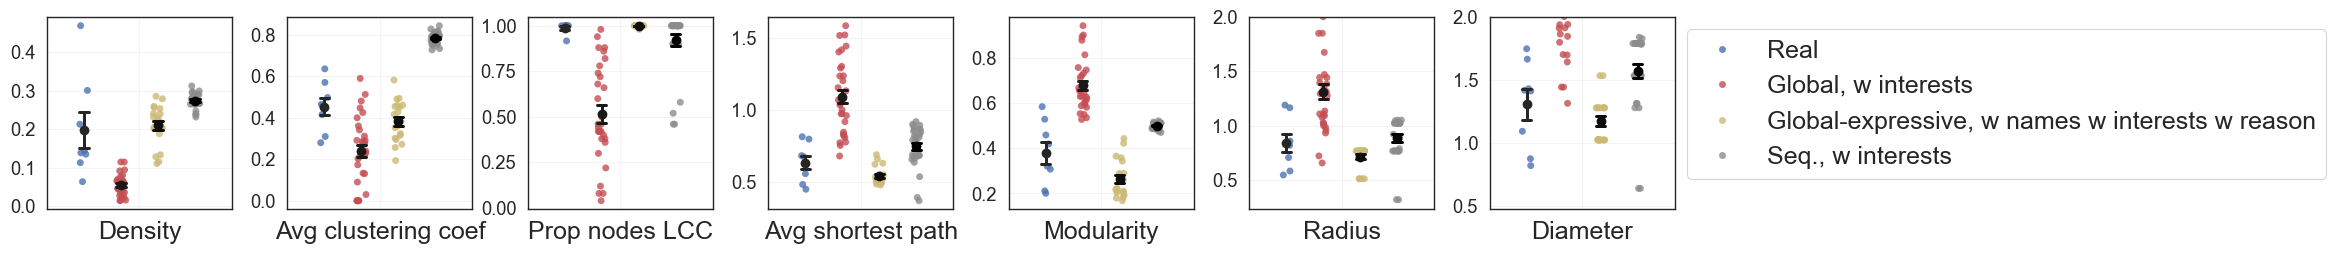

In [349]:
# main results - GPT 3.5 metrics, separate plots
to_keep = ['real', 'global_gpt-3.5-turbo', 'local_gpt-3.5-turbo', 'sequential_gpt-3.5-turbo']
to_keep = ['real', 'global_gpt-4o_w_interests', 'global-expressive_gpt-4o_w_names_w_interests_w_reason', 'sequential_gpt-4o_w_interests']
kept_df = network_df[network_df.save_name.isin(to_keep)]
pastel_palette = sns.color_palette("deep")
colors = {'real': pastel_palette[0],
          'global_gpt-4o_w_interests': pastel_palette[3],
          'global-expressive_gpt-4o_w_interests': pastel_palette[4],
          'global-expressive_gpt-4o_w_interests_w_reason': pastel_palette[5],
          'global-expressive_gpt-4o-mini_w_interests_w_reason': pastel_palette[6],
          'sequential_gpt-4o_w_interests': pastel_palette[7],
          'global-expressive_gpt-4o_w_names_w_interests_w_reason': pastel_palette[8]}
plot_metrics_separately(kept_df, plot_type='default', x_to_keep=x_to_keep, palette=colors, 
                            simplify_legend=True, legend_mapper=None)

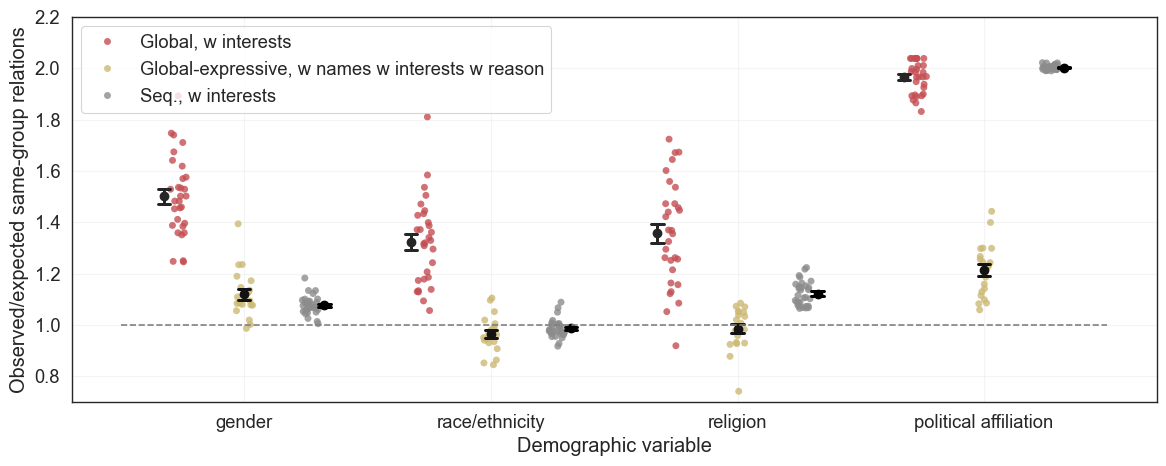

In [350]:
# GPT 3.5 - main results on homophily
to_keep = ['global_gpt-3.5-turbo', 'local_gpt-3.5-turbo', 'sequential_gpt-3.5-turbo', 'sequential_gpt-3.5-turbo_ALL_SHUFFLED', 'sequential_gpt-3.5-turbo_w_interests']
to_keep = ['real', 'global_gpt-4o_w_interests', 'global-expressive_gpt-4o_w_names_w_interests_w_reason', 'sequential_gpt-4o_w_interests']
kept_df = homophily_df[homophily_df.save_name.isin(to_keep) & (homophily_df['demo'] != 'age')]
pastel_palette = sns.color_palette("deep")
colors = {'real': pastel_palette[0],
          'global_gpt-4o_w_interests': pastel_palette[3],
          'global-expressive_gpt-4o_w_interests': pastel_palette[4],
          'global-expressive_gpt-4o_w_interests_w_reason': pastel_palette[5],
          'global-expressive_gpt-4o-mini_w_interests_w_reason': pastel_palette[6],
          'sequential_gpt-4o_w_interests': pastel_palette[7],
          'global-expressive_gpt-4o_w_names_w_interests_w_reason': pastel_palette[8]}
make_plot(kept_df, plot_homophily=True, plot_type='default', y_lim=(0.7, 2.2), figsize=(14, 5), dodge=0.65, palette=colors)

Dropping node-level stats: kept 616 out of 13657 rows
Keeping rows in ['Density', 'Avg clustering coef', 'Prop nodes LCC', 'Avg shortest path', 'Modularity', 'Radius', 'Diameter']: kept 616 out of 616 rows


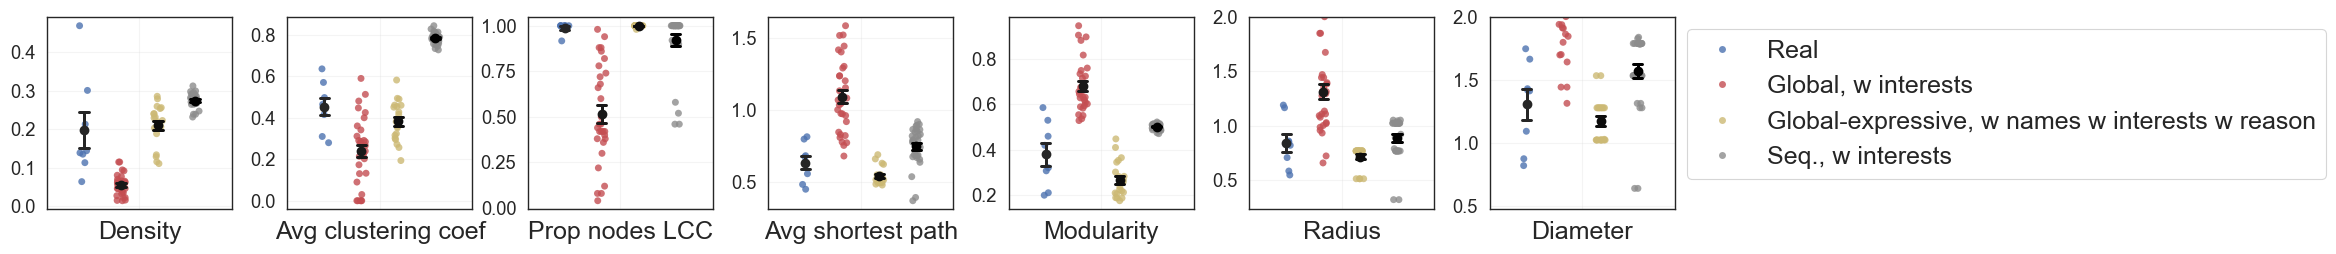

Dropping node-level stats: kept 616 out of 13657 rows
Keeping rows in ['Density', 'Avg clustering coef', 'Prop nodes LCC', 'Avg shortest path', 'Modularity', 'Radius', 'Diameter']: kept 616 out of 616 rows


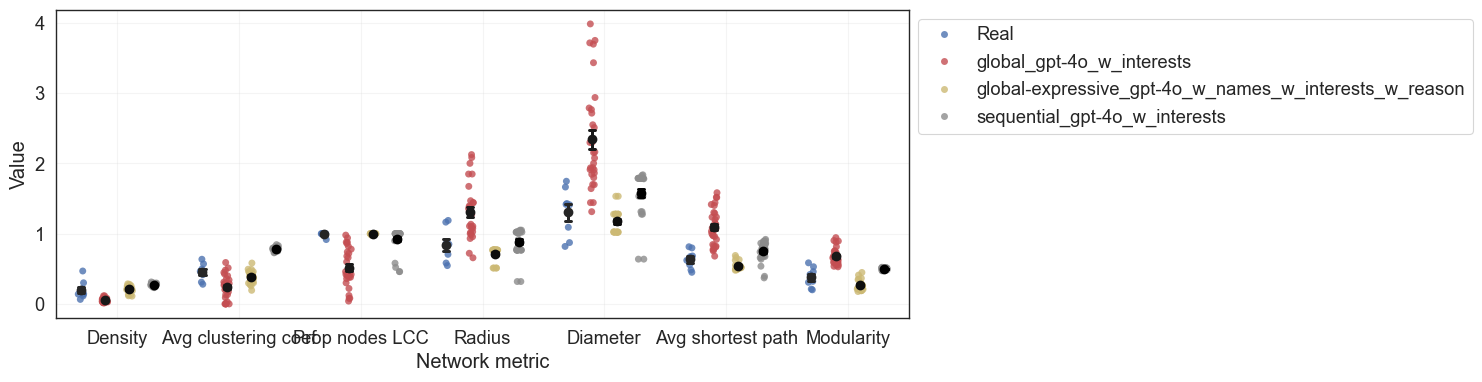

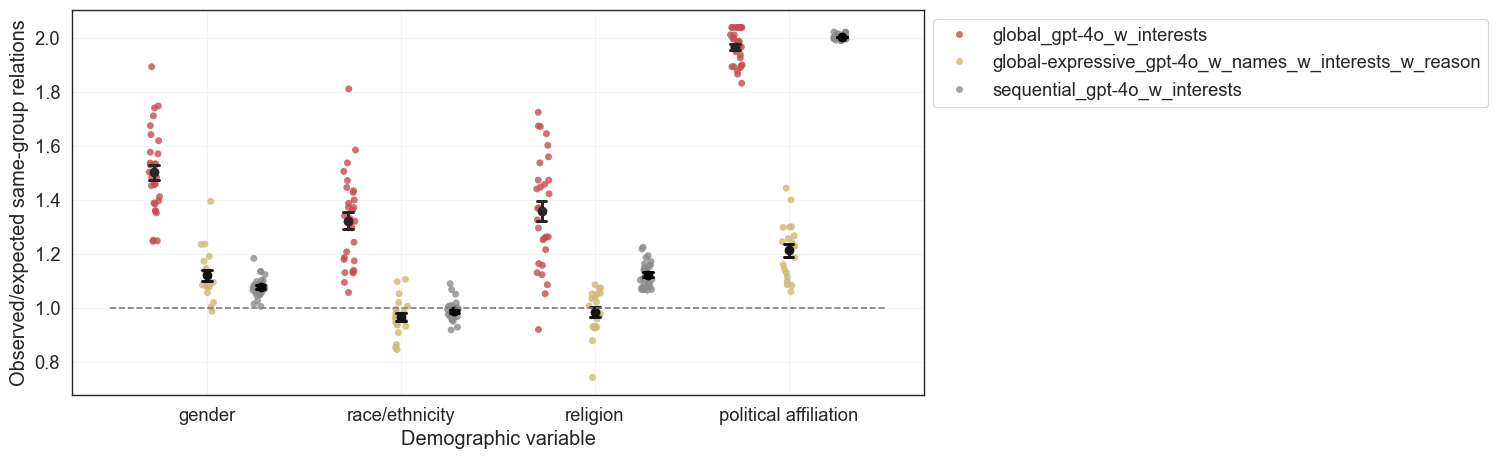

In [359]:
# compare GPT 3.5 vs GPT 4o
to_keep = ['real', 'sequential_gpt-3.5-turbo', 'sequential_gpt-4o', 'sequential_gpt-4o_n5']

to_keep = ['real', 'global_gpt-4o_w_interests', 'global-expressive_gpt-4o_w_names_w_interests_w_reason', 'sequential_gpt-4o_w_interests']
#to_keep = ['real', 'global-expressive_gpt-4o_w_names_w_interests_w_reason', 'sequential_gpt-4o_w_interests']

kept_df = network_df[network_df.save_name.isin(to_keep)]
legend_mapper = {'real': 'Real',
                 'global_gpt-4o_w_interests': 'global_gpt-4o_w_interests',
                 'global-expressive_gpt-4o_w_interests': 'global-expressive_gpt-4o_w_interests',
                 'global-expressive_gpt-4o_w_interests_w_reason': 'global-expressive_gpt-4o_w_interests_w_reason',
                 'global-expressive_gpt-4o-mini_w_interests_w_reason': 'global-expressive_gpt-4o-mini_w_interests_w_reason',
                 'global-expressive_gpt-4o_w_names_w_interests_w_reason': 'global-expressive_gpt-4o_w_names_w_interests_w_reason',
                 'sequential_gpt-4o_w_interests': 'sequential_gpt-4o_w_interests'}
pastel_palette = sns.color_palette("deep")
colors = {'real': pastel_palette[0],
          'global_gpt-4o_w_interests': pastel_palette[3],
          'global-expressive_gpt-4o_w_interests': pastel_palette[4],
          'global-expressive_gpt-4o_w_interests_w_reason': pastel_palette[5],
          'global-expressive_gpt-4o-mini_w_interests_w_reason': pastel_palette[6],
          'sequential_gpt-4o_w_interests': pastel_palette[7],
          'global-expressive_gpt-4o_w_names_w_interests_w_reason': pastel_palette[8]}

plot_metrics_separately(kept_df, plot_type='default', x_to_keep=x_to_keep, palette=colors, 
                            simplify_legend=True, legend_mapper=None)
make_plot(kept_df, plot_type='default', legend_mapper=legend_mapper, palette=colors, x_to_keep=x_to_keep, figsize=(11, 4), legend_pos=(1,1))

to_keep.remove('real')
kept_df = homophily_df[homophily_df.save_name.isin(to_keep) & (homophily_df['demo'] != 'age')]
make_plot(kept_df, plot_homophily=True, plot_type='default', legend_mapper=legend_mapper, palette=colors, 
          dodge=0.55, figsize=(11, 5), legend_pos=(1,1))

Dropping node-level stats: kept 1106 out of 24647 rows
Keeping rows in ['Density', 'Avg clustering coef', 'Prop nodes LCC', 'Avg shortest path', 'Modularity']: kept 790 out of 1106 rows


ValueError: The palette dictionary is missing keys: {'global-expressive_gpt-4o-mini_w_interests_w_reason'}

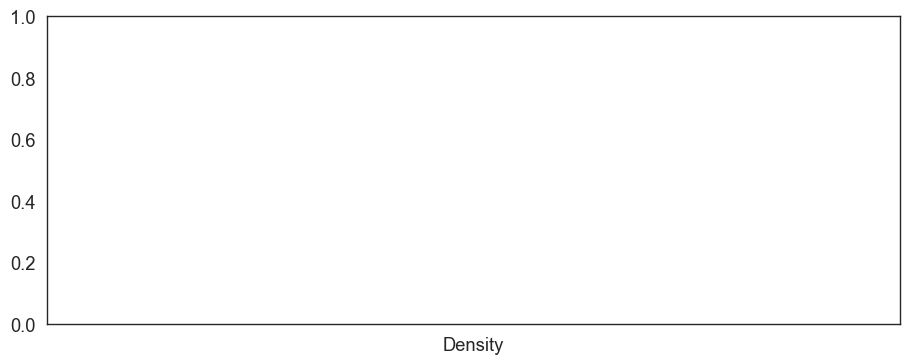

In [72]:
# compare GPT 3.5 vs Llama
to_keep = ['real', 'sequential_gpt-3.5-turbo', 'sequential_llama3.1-8b', 'sequential_llama3.1-8b_n5', 'sequential_llama3.1-70b', 'sequential_llama3.1-70b_n5']
to_keep = ['real', 'global_gpt-4o_w_interests', 'global-expressive_gpt-4o_w_interests', 'global-expressive_gpt-4o_w_interests_w_reason', 'global-expressive_gpt-4o-mini_w_interests_w_reason',  'sequential_gpt-4o_w_interests']
kept_df = network_df[network_df.save_name.isin(to_keep)]
legend_mapper = {'real': 'Real',
                 'global_gpt-4o_w_interests': 'global_gpt-4o_w_interests',
                 'global-expressive_gpt-4o_w_interests': 'global-expressive_gpt-4o_w_interests',
                 'global-expressive_gpt-4o_w_interests_w_reason': 'global-expressive_gpt-4o_w_interests_w_reason',
                 'global-expressive_gpt-4o-mini_w_interests_w_reason': 'global-expressive_gpt-4o-mini_w_interests_w_reason',
                 'sequential_gpt-4o_w_interests': 'sequential_gpt-4o_w_interests'}
pastel_palette = sns.color_palette("pastel")
colors = {'real': pastel_palette[0],
          'global_gpt-4o_w_interests': pastel_palette[3],
          'global-expressive_gpt-4o_w_interests': pastel_palette[4],
          'global-expressive_gpt-4o_w_interests_w_reason': pastel_palette[5],
          'sequential_gpt-4o_w_interests': pastel_palette[6]}

make_plot(kept_df, plot_homophily=False, plot_type='default', legend_mapper=legend_mapper, palette=colors,
          x_to_keep=x_to_keep, figsize=(11, 4), legend_pos=(1,1), dodge=0.67)

to_keep.remove('real')
kept_df = homophily_df[homophily_df.save_name.isin(to_keep) & (homophily_df['demo'] != 'age')]
make_plot(kept_df, plot_homophily=True, plot_type='default', legend_mapper=legend_mapper, palette=colors, 
          dodge=0.65, figsize=(11, 5), legend_pos=(1,1))

Dropping node-level stats: kept 896 out of 19937 rows
Keeping rows in ['Density', 'Avg clustering coef', 'Prop nodes LCC', 'Avg shortest path', 'Modularity']: kept 512 out of 896 rows


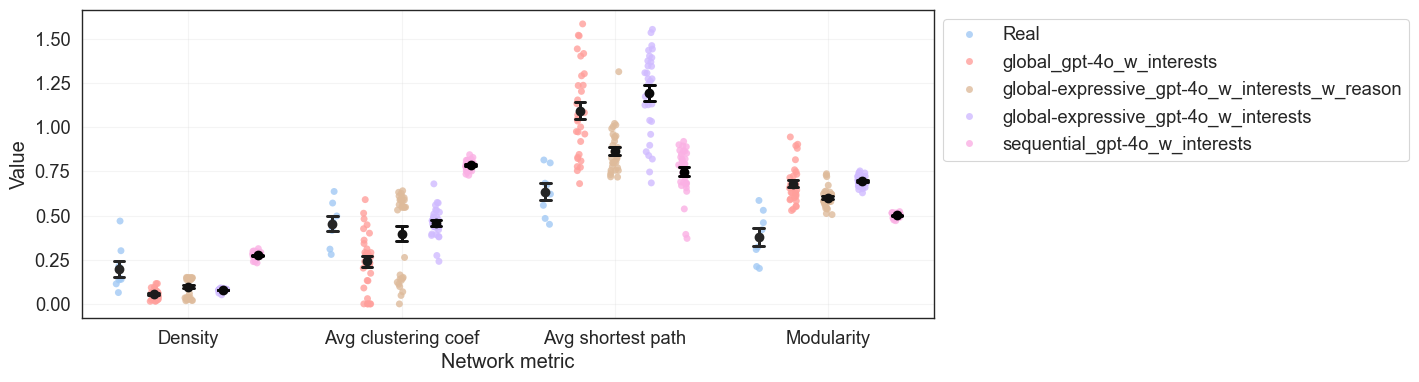

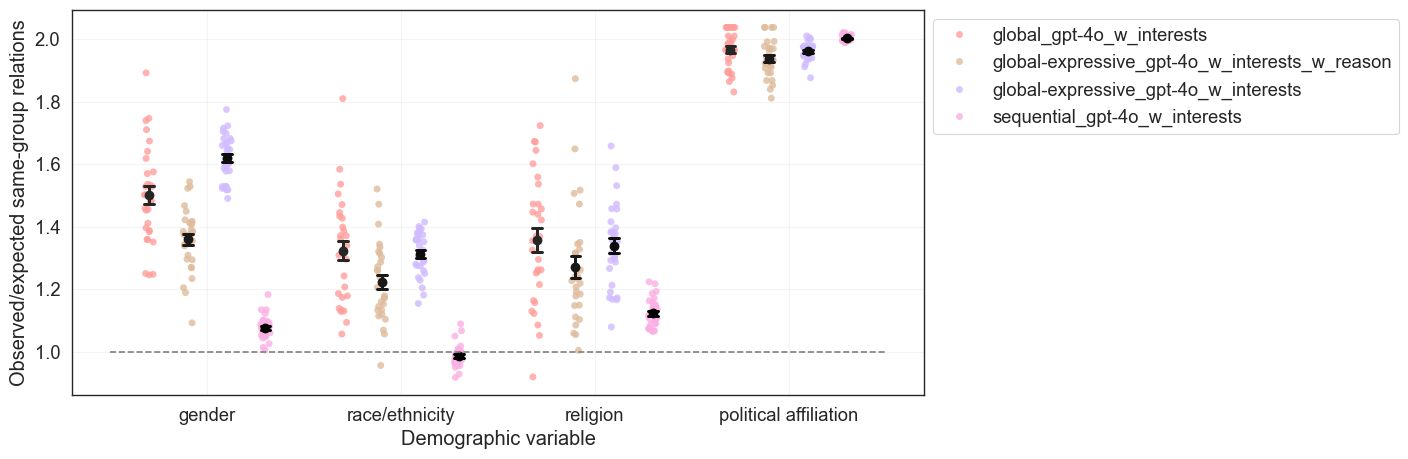

In [57]:
# compare GPT 3.5 vs Gemma
to_keep = ['real', 'global_gpt-4o_w_interests', 'global-expressive_gpt-4o_w_interests', 'global-expressive_gpt-4o_w_interests_w_reason', 'sequential_gpt-4o_w_interests']
kept_df = network_df[network_df.save_name.isin(to_keep)]
legend_mapper = {'real': 'Real',
                 'global_gpt-4o_w_interests': 'global_gpt-4o_w_interests',
                 'global-expressive_gpt-4o_w_interests': 'global-expressive_gpt-4o_w_interests',
                 'global-expressive_gpt-4o_w_interests_w_reason': 'global-expressive_gpt-4o_w_interests_w_reason',
                 'sequential_gpt-4o_w_interests': 'sequential_gpt-4o_w_interests'}
pastel_palette = sns.color_palette("pastel")
colors = {'real': pastel_palette[0],
          'global_gpt-4o_w_interests': pastel_palette[3],
          'global-expressive_gpt-4o_w_interests': pastel_palette[4],
          'global-expressive_gpt-4o_w_interests_w_reason': pastel_palette[5],
          'sequential_gpt-4o_w_interests': pastel_palette[6]}
make_plot(kept_df, plot_homophily=False, plot_type='default', legend_mapper=legend_mapper, palette=colors,
          x_to_keep=x_to_keep, figsize=(11, 4), legend_pos=(1,1), dodge=0.65) # , y_lim=(-0.1, 1.9))

to_keep.remove('real')
kept_df = homophily_df[homophily_df.save_name.isin(to_keep) & (homophily_df['demo'] != 'age')]
make_plot(kept_df, plot_homophily=True, plot_type='default', legend_mapper=legend_mapper, palette=colors,
          figsize=(11, 5), dodge=0.6, legend_pos=(1,1))

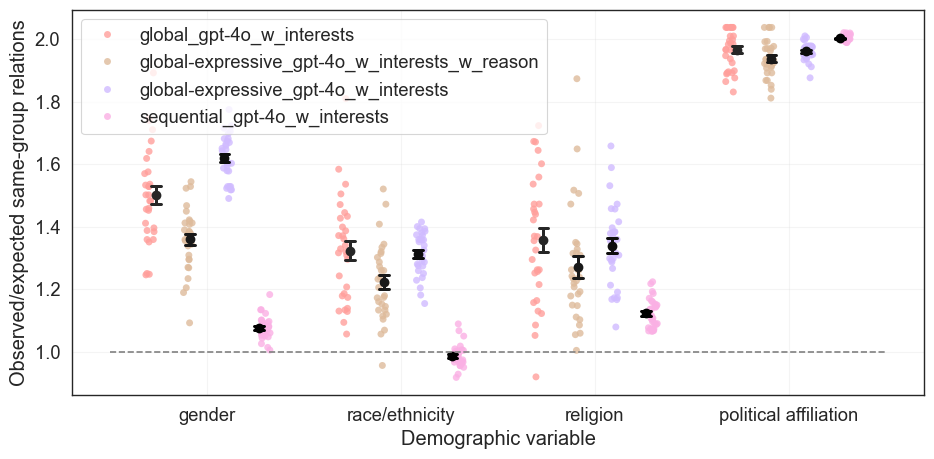

In [58]:
# homophily with interests
to_keep = ['real', 'global_gpt-4o_w_interests', 'global-expressive_gpt-4o_w_interests', 'global-expressive_gpt-4o_w_interests_w_reason', 'sequential_gpt-4o_w_interests']
kept_df = network_df[network_df.save_name.isin(to_keep)]
legend_mapper = {'real': 'Real',
                 'global_gpt-4o_w_interests': 'global_gpt-4o_w_interests',
                 'global-expressive_gpt-4o_w_interests': 'global-expressive_gpt-4o_w_interests',
                 'global-expressive_gpt-4o_w_interests_w_reason': 'global-expressive_gpt-4o_w_interests_w_reason',
                 'sequential_gpt-4o_w_interests': 'sequential_gpt-4o_w_interests'}
pastel_palette = sns.color_palette("pastel")
colors = {'real': pastel_palette[0],
          'global_gpt-4o_w_interests': pastel_palette[3],
          'global-expressive_gpt-4o_w_interests': pastel_palette[4],
          'global-expressive_gpt-4o_w_interests_w_reason': pastel_palette[5],
          'sequential_gpt-4o_w_interests': pastel_palette[6]}
kept_df = homophily_df[homophily_df.save_name.isin(to_keep) & (homophily_df['demo'] != 'age')]
make_plot(kept_df, plot_homophily=True, plot_type='default', legend_mapper=legend_mapper, palette=colors,
          figsize=(11, 5), dodge=0.53)

Dropping node-level stats: kept 896 out of 19937 rows
Keeping rows in ['Density', 'Avg clustering coef', 'Prop nodes LCC', 'Avg shortest path', 'Modularity']: kept 512 out of 896 rows


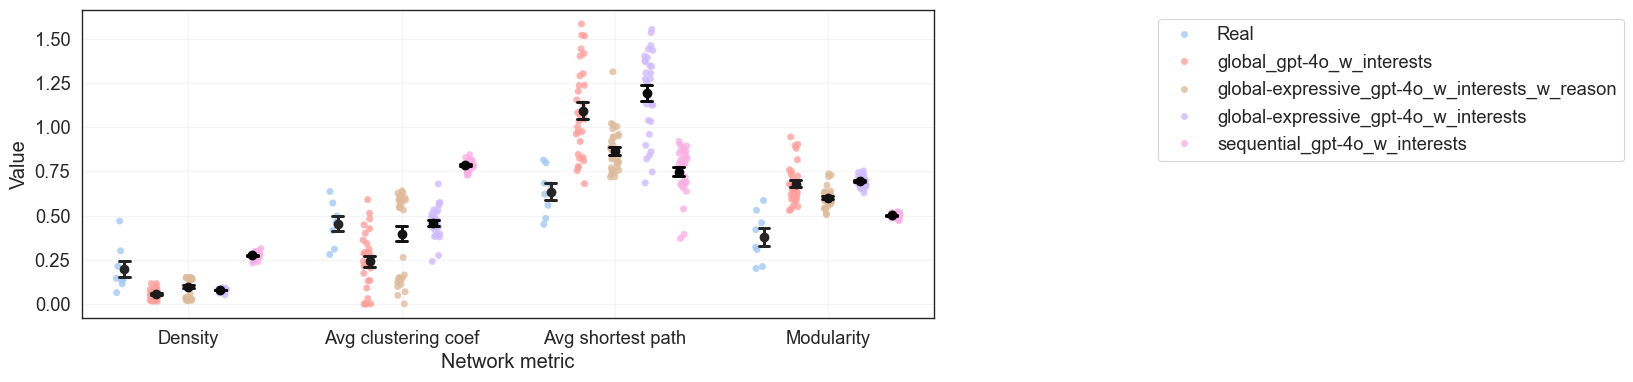

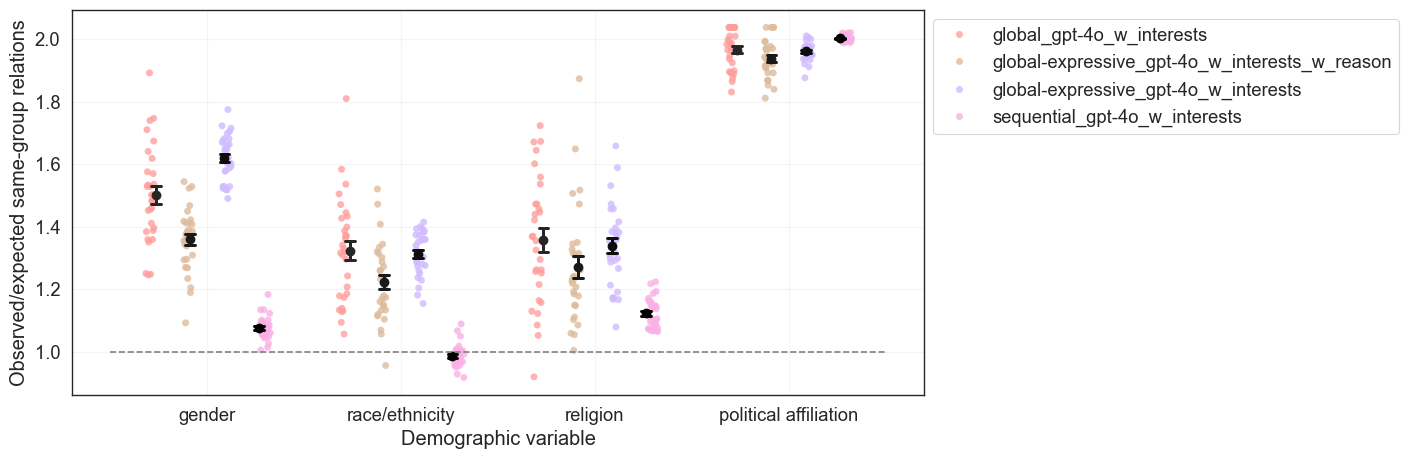

In [59]:
# compare across temperatures

to_keep = ['real', 'global_gpt-4o_w_interests', 'global-expressive_gpt-4o_w_interests', 'global-expressive_gpt-4o_w_interests_w_reason', 'sequential_gpt-4o_w_interests']
kept_df = network_df[network_df.save_name.isin(to_keep)]
legend_mapper = {'real': 'Real',
                 'global_gpt-4o_w_interests': 'global_gpt-4o_w_interests',
                 'global-expressive_gpt-4o_w_interests': 'global-expressive_gpt-4o_w_interests',
                 'global-expressive_gpt-4o_w_interests_w_reason': 'global-expressive_gpt-4o_w_interests_w_reason',
                 'sequential_gpt-4o_w_interests': 'sequential_gpt-4o_w_interests'}
pastel_palette = sns.color_palette("pastel")
colors = {'real': pastel_palette[0],
          'global_gpt-4o_w_interests': pastel_palette[3],
          'global-expressive_gpt-4o_w_interests': pastel_palette[4],
          'global-expressive_gpt-4o_w_interests_w_reason': pastel_palette[5],
          'sequential_gpt-4o_w_interests': pastel_palette[6]}
kept_df = network_df[network_df.save_name.isin(to_keep)]
make_plot(kept_df, plot_homophily=False, plot_type='default', legend_mapper=legend_mapper, palette=colors,
          x_to_keep=x_to_keep, figsize=(11, 4), legend_pos=(1.252,1))

# compare different temperatures
to_keep.remove('real')
kept_df = homophily_df[homophily_df.save_name.isin(to_keep) & (homophily_df['demo'] != 'age')]
make_plot(kept_df, plot_homophily=True, plot_type='default', legend_mapper=legend_mapper, palette=colors,
          figsize=(11, 5), legend_pos=(1,1), dodge=0.53)

Dropping node-level stats: kept 686 out of 15227 rows
Keeping rows in ['Density', 'Avg clustering coef', 'Prop nodes LCC', 'Avg shortest path', 'Modularity']: kept 490 out of 686 rows


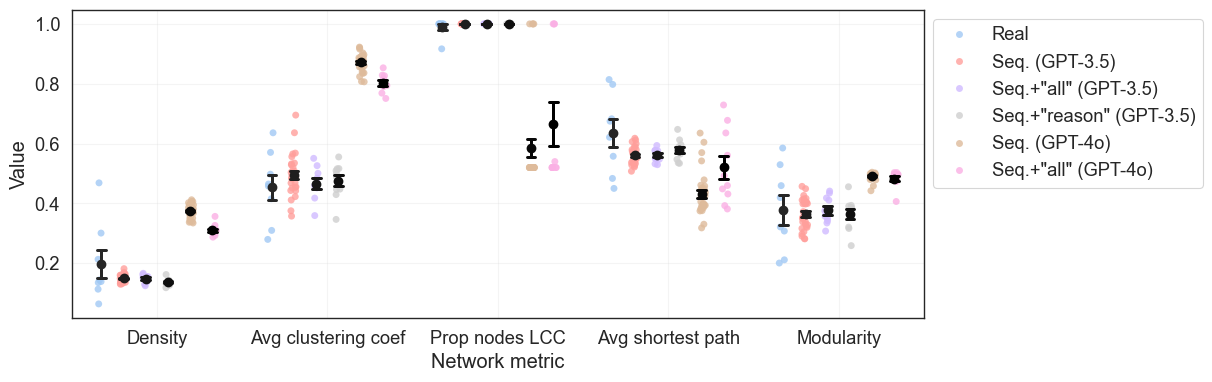

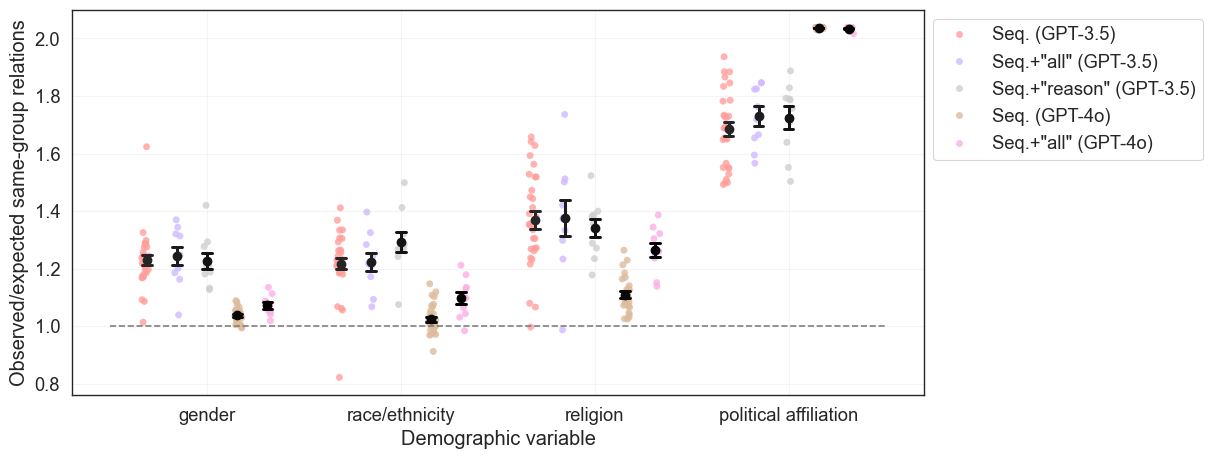

In [15]:
# testing "Pay all to all demographics"
to_keep = ['real', 'sequential_gpt-3.5-turbo', 'sequential_gpt-3.5-turbo_prompt_all', 'sequential_gpt-4o', 'sequential_gpt-4o_prompt_all', 'sequential_gpt-3.5-turbo_w_reason']
kept_df = network_df[network_df.save_name.isin(to_keep)]
legend_mapper = {'real': 'Real', 
                 'sequential_gpt-3.5-turbo': 'Seq. (GPT-3.5)',
                 'sequential_gpt-3.5-turbo_prompt_all': 'Seq.+"all" (GPT-3.5)',
                 'sequential_gpt-4o': 'Seq. (GPT-4o)',
                 'sequential_gpt-4o_prompt_all': 'Seq.+"all" (GPT-4o)',
                 'sequential_gpt-3.5-turbo_w_reason': 'Seq.+"reason" (GPT-3.5)'}
colors = {'real': pastel_palette[0],
                 'sequential_gpt-3.5-turbo': pastel_palette[3],
                 'sequential_gpt-3.5-turbo_prompt_all': pastel_palette[4],
                 'sequential_gpt-4o': pastel_palette[5],
                 'sequential_gpt-4o_prompt_all': pastel_palette[6],
                 'sequential_gpt-3.5-turbo_w_reason': pastel_palette[7]}
make_plot(kept_df, plot_homophily=False, plot_type='default', legend_mapper=legend_mapper, palette=colors,
          x_to_keep=x_to_keep, figsize=(11, 4), dodge=0.65)

to_keep.remove('real')
kept_df = homophily_df[homophily_df.save_name.isin(to_keep) & (homophily_df['demo'] != 'age')]
make_plot(kept_df, plot_homophily=True, plot_type='default', figsize=(11, 5), legend_mapper=legend_mapper, palette=colors,
          dodge=0.62, legend_pos=(1,1))

[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
real 347 0.7666666666666666
global_gpt-3.5-turbo 1500 1.0
local_gpt-3.5-turbo 1500 0.5306122448979591
sequential_gpt-3.5-turbo 1500 0.6938775510204082


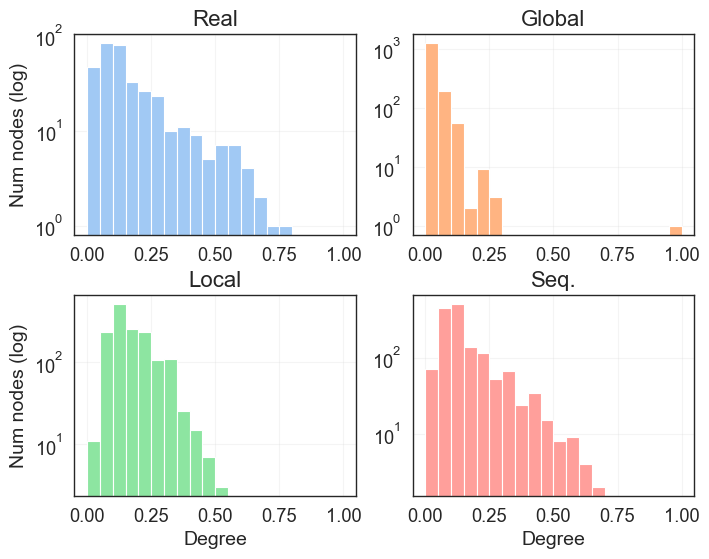

In [17]:
to_keep = ['real', 'global_gpt-3.5-turbo', 'local_gpt-3.5-turbo', 'sequential_gpt-3.5-turbo']
kept_df = network_df[network_df.save_name.isin(to_keep)]

palette = get_pallete(kept_df)
fig, axes = plt.subplots(2, 2, figsize=(8, 6))
fig.subplots_adjust(hspace=0.3)
bins = np.arange(0, 1.01, 0.05)
print(bins)

for i, ax in enumerate(axes.flatten()):
    name = to_keep[i]
    degrees = kept_df[(kept_df.save_name == name) & (kept_df.metric_name == 'Degree centrality')]['_metric_value'].values
    print(name, len(degrees), degrees.max())
    ax.hist(degrees, bins=bins, color=palette[name])
    ax.set_yscale('log')
    if i % 2 == 0:
        ax.set_ylabel('Num nodes (log)', fontsize=14)
    if i >= 2:
        ax.set_xlabel('Degree', fontsize=14)
    ax.set_title(get_short_name(name), fontsize=16)
    ax.grid(alpha=0.2)

In [18]:
real_df = load_real_homophily(same_group=True)
real_df.sort_values('save_name').round(2)

,save_name,demo,_metric_value
4,gss-1985,gender,1.19
2,gss-1985,race/ethnicity,1.32
3,gss-1985,religion,1.63
7,gss-2004,gender,1.12
5,gss-2004,race/ethnicity,1.47
6,gss-2004,religion,2.08
0,laniado-friend,gender,1.04
1,laniado-interaction,gender,1.12
10,myspace,gender,0.96
8,myspace,race/ethnicity,1.96


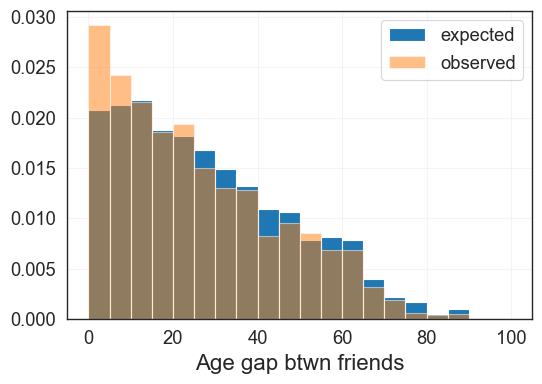

In [19]:
# age homophily
fn = os.path.join(PATH_TO_TEXT_FILES, 'us_50_gpt4o_w_interests.json')
with open(fn) as f:
    personas = json.load(f)

method = 'sequential'
model = 'gpt-3.5-turbo'
list_of_G = load_list_of_graphs(f'{method}_{model}', 0, 30, directed=False)
plot_expected_vs_observed_age_gaps(list_of_G, personas)

In [393]:
def report_isolation_index(method, model):
    list_of_G = load_list_of_graphs(f'{method}_{model}', 0, 30, directed=False)
    print(f'{method}_{model}: found {len(list_of_G)} graphs')
    isolation = []
    exposure_c = []
    exposure_l = []
    for G in list_of_G:
        i, c, l = compute_isolation_index(G, personas)
        isolation.append(i)
        exposure_c.append(c)
        exposure_l.append(l)
    print(f'Isolation: {np.mean(isolation):0.3f}, {np.std(isolation)/np.sqrt(len(isolation)):0.3f}')
    print(f'Avg exposure, conservative: {np.mean(exposure_c):0.3f}, {np.std(exposure_c)/np.sqrt(len(exposure_c)):0.3f}')
    print(f'Avg exposure, liberal: {np.mean(exposure_l):0.3f}, {np.std(exposure_l)/np.sqrt(len(exposure_l)):0.3f}')

model = 'gpt-3.5-turbo'
for method in ['global', 'local', 'sequential']:
    print(method)
    report_isolation_index(method, model)
    print()


global
global_gpt-3.5-turbo: found 30 graphs


NameError: name 'personas' is not defined

In [ ]:
def report_polarization(method, model):
    list_of_G = load_list_of_graphs(f'{method}_{model}', 0, 30, directed=False)
    print(f'{method}_{model}: found {len(list_of_G)} graphs')
    pol = []
    for G in list_of_G:
        p = compute_polarization(G, personas)
        pol.append(p)
    print(f'Polarization: mean={np.mean(pol):0.3f}, se={np.std(pol)/np.sqrt(len(pol)):0.3f}')

model = 'gpt-3.5-turbo'
for method in ['global', 'local', 'sequential']:
    print(method)
    report_polarization(method, model)
    print()


global
global_gpt-3.5-turbo: found 30 graphs
Polarization: mean=0.332, se=0.032

local
local_gpt-3.5-turbo: found 30 graphs
Polarization: mean=0.639, se=0.037

sequential
sequential_gpt-3.5-turbo: found 30 graphs
Polarization: mean=0.515, se=0.041



# Comparison to classical models

In [42]:
metrics = ['Density', 'Avg clustering coef', 'Prop nodes LCC', 'Avg shortest path', 'Modularity', 'Degree centrality']
real_mean = network_df[network_df['save_name'] == 'real'].groupby('metric_name')['_metric_value'].agg(['mean', 'sem'])
real_mean

,mean,sem
metric_name,,
Avg clustering coef,0.454084,0.042551
Avg shortest path,0.635332,0.047373
Betweenness centrality,0.032375,0.002592
Closeness centrality,0.428230,0.006916
Degree centrality,0.175672,0.008144
Density,0.197454,0.046188
Diameter,1.307066,0.121943
Modularity,0.378153,0.049146
Prop nodes LCC,0.989583,0.010417


In [44]:
n = 50
total_edges = n * (n-1) / 2
real_density = real_mean.loc['Density']['mean'] # real networks' mean density
exp_edges = total_edges * real_density
print(exp_edges)

241.8815914855653


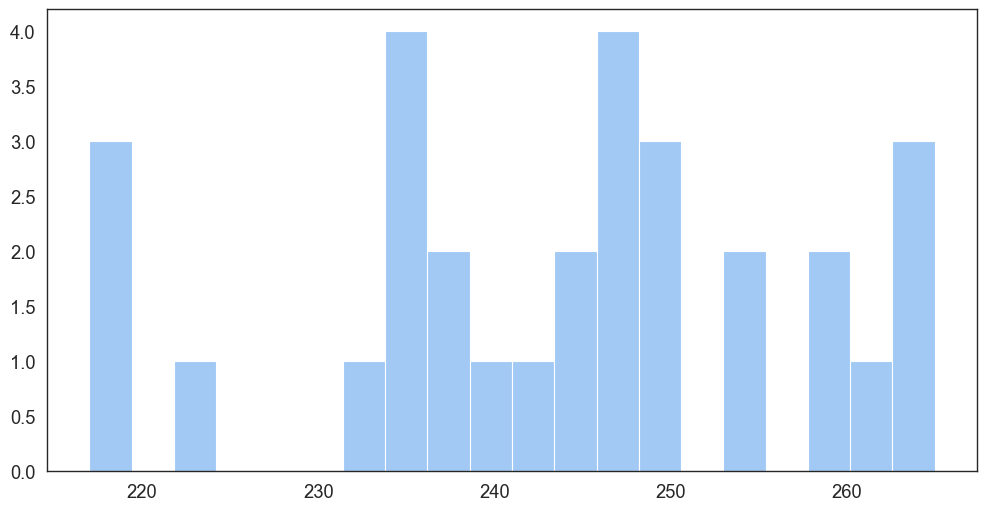

In [10]:
# erdos-renyi
p = real_density
edges = []
for s in range(30):
    G = nx.erdos_renyi_graph(n, p, seed=s)
    edges.append(len(G.edges()))
    fn = os.path.join(PATH_TO_TEXT_FILES, f'er_{s}.adj')
    nx.write_adjlist(G, fn)
plt.hist(edges, bins=20)
plt.show()

Using m = 5
{225}


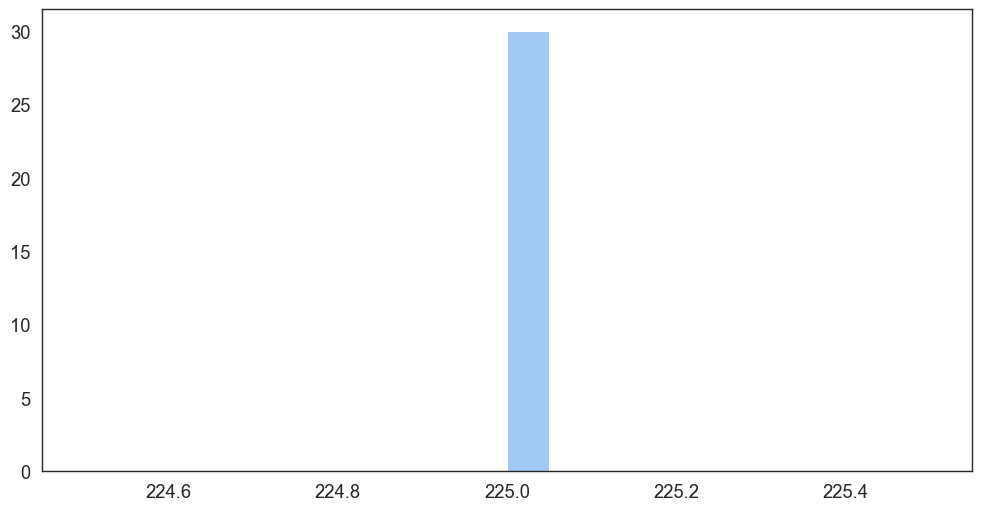

In [46]:
# barabasi-albert
n = 50
best_m = None 
best_diff = 1e6
for m in range(1, 8):
    G = nx.barabasi_albert_graph(n, m, seed=s)
    num_edges = len(G.edges())
    diff = np.abs(len(G.edges()) - exp_edges)
    if diff < best_diff:
        best_diff = diff 
        best_m = m 
print('Using m =', best_m)

edges = []
for s in range(30):
    G = nx.barabasi_albert_graph(n, best_m, seed=s)
    edges.append(len(G.edges()))
    fn = os.path.join(PATH_TO_TEXT_FILES, f'ba_{s}.adj')
    nx.write_adjlist(G, fn)
print(set(edges))
plt.hist(edges, bins=20)
plt.show()

In [18]:
# watts-strogatz 
for k in np.arange(4, 16, 2):
    for p in np.arange(0.05, 0.16, 0.05):
        for s in range(5):
            G = nx.watts_strogatz_graph(n, k, p, seed=s)
            assert len(G.edges()) == (n*k)/2

In [47]:
# fit k (number of neighbors)
best_k = None 
best_diff = 1e6
p = 0.01
for k in np.arange(8, 13, 2):
    G = nx.watts_strogatz_graph(n, k, p, seed=s)
    num_edges = len(G.edges())
    assert num_edges == (n*k)/2
    diff = np.abs(num_edges - exp_edges)
    print(k, diff)
    if diff < best_diff:
        best_diff = diff 
        best_k = k 
print('Using k =', best_k)

8 41.88159148556531
10 8.118408514434691
12 58.11840851443469
Using k = 10


best p =  0.15


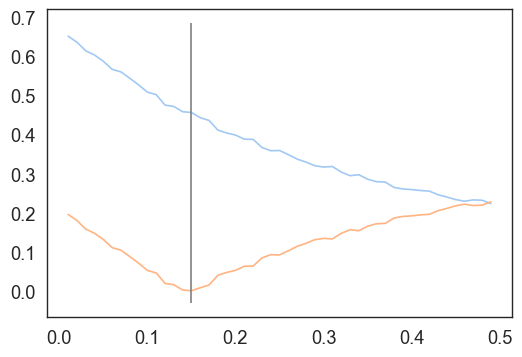

In [49]:
# fit p (rewiring probability)
best_p = None 
best_diff = 1e6
p_options = np.arange(0.01, 0.5, 0.01)
p_clustering = []
for p in p_options:
    clustering = []
    for s in range(30):
        G = nx.watts_strogatz_graph(n, best_k, p)
        clustering.append(nx.average_clustering(G))
    p_clustering.append(np.mean(clustering))
plt.figure(figsize=(6,4))
plt.plot(p_options, p_clustering)
diff = np.abs(p_clustering - real_mean.loc['Avg clustering coef']['mean'])
plt.plot(p_options, diff)
min_val = p_options[np.argmin(diff)]
best_p = min_val.round(3)
print('best p = ', best_p)
ymin, ymax = plt.ylim()
plt.vlines([min_val], ymin, ymax, color='grey')
plt.show()

In [ ]:
for s in range(30):
    G = nx.watts_strogatz_graph(n, best_k, best_p, seed=s)
    fn = os.path.join(PATH_TO_TEXT_FILES, f'ws_{s}.adj')
    nx.write_adjlist(G, fn)

In [ ]:
# summarize network models
min_seed = 0
max_seed = 29
for model in ['er', 'ba', 'ws']: 
    list_of_G, t1, t2 = load_list_of_graphs(model, min_seed, max_seed+1, directed=False, include_ts=True)
    print(f'{model}: found {len(list_of_G)} graphs ({t1} TO {t2})')
    summarize_network_metrics(list_of_G, None, None, model, demos=False)
    print()

er: found 30 graphs (Mon Aug 26 15:10:24 2024 TO Mon Aug 26 15:10:24 2024)
Saved network metrics to er/network_metrics.csv

ba: found 30 graphs (Mon Aug 26 15:23:15 2024 TO Mon Aug 26 15:23:15 2024)
Saved network metrics to ba/network_metrics.csv

ws: found 30 graphs (Mon Aug 26 15:35:46 2024 TO Mon Aug 26 15:35:46 2024)
Saved network metrics to ws/network_metrics.csv



In [ ]:
network_df = pd.read_csv(f'stats/real/network_metrics.csv')
metric_dfs = [network_df]
homophily_dfs = []

# load network metrics and homophily for generated networks
model = 'gpt-3.5-turbo'
for method in ['global', 'local', 'sequential']: # , 'iterative']:
    metric_dfs.append(pd.read_csv(f'stats/{method}_{model}/network_metrics.csv'))

for model in ['er', 'ba', 'ws']:
    metric_dfs.append(pd.read_csv(f'stats/{model}/network_metrics.csv'))

network_df = pd.concat(metric_dfs)
print(network_df.groupby('save_name').size())

save_name
ba                          4710
er                          4710
global_gpt-3.5-turbo        4710
local_gpt-3.5-turbo         4710
real                        1097
sequential_gpt-3.5-turbo    4710
ws                          4710
dtype: int64


In [ ]:
results = []
for method in ['er', 'ba', 'ws', 'global', 'local', 'sequential']:
    if len(method) > 2:
        save_name = f'{method}_gpt-3.5-turbo'
    else:
        save_name = method
    for metric in ['density', 'avg_clustering_coef', 'prop_nodes_lcc', 'avg_shortest_path', 'modularity', 'degree_centrality']:
        mean_diff, mean_diff_norm, ks_stat, ks_pval = compare_network_metrics(network_df, metric, save_name)
        results.append({'method': method, 'metric': metric, 'mean_diff': mean_diff, 'mean_diff_norm': mean_diff_norm,
                        'ks_stat': ks_stat, 'ks_pval': ks_pval})
df = pd.DataFrame(results)
df.round(3)

Found 8 real and 30 generated values
Found 8 real and 30 generated values
Found 8 real and 30 generated values
Found 8 real and 30 generated values
Found 8 real and 30 generated values
Found 347 real and 1500 generated values
Found 8 real and 30 generated values
Found 8 real and 30 generated values
Found 8 real and 30 generated values
Found 8 real and 30 generated values
Found 8 real and 30 generated values
Found 347 real and 1500 generated values
Found 8 real and 30 generated values
Found 8 real and 30 generated values
Found 8 real and 30 generated values
Found 8 real and 30 generated values
Found 8 real and 30 generated values
Found 347 real and 1500 generated values
Found 8 real and 30 generated values
Found 8 real and 30 generated values
Found 8 real and 30 generated values
Found 8 real and 30 generated values
Found 8 real and 30 generated values
Found 347 real and 1500 generated values
Found 8 real and 30 generated values
Found 8 real and 30 generated values
Found 8 real and 30 ge

,method,metric,mean_diff,mean_diff_norm,ks_stat,ks_pval
0,er,density,0.002,0.013,0.625,0.007
1,er,avg_clustering_coef,0.257,2.286,1.000,0.000
2,er,prop_nodes_lcc,0.010,0.378,0.125,1.000
3,er,avg_shortest_path,0.145,1.156,0.750,0.000
4,er,modularity,0.149,1.149,0.750,0.000
5,er,degree_centrality,0.023,0.154,0.465,0.000
6,ba,density,0.014,0.113,0.625,0.007
7,ba,avg_clustering_coef,0.153,1.363,0.750,0.000
8,ba,prop_nodes_lcc,0.010,0.378,0.125,1.000
9,ba,avg_shortest_path,0.135,1.081,0.750,0.000
